In [1]:
from statistics import mean

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import nltk as nl
from sklearn.feature_extraction import _stop_words
from numpy import std
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import nltk
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
spam_data = pd.read_csv('./Dataset/spam.csv', delimiter=',', encoding='latin-1')
real_data = pd.read_csv('./Dataset/real.csv', delimiter=',', encoding='latin-1')

indo_data = pd.read_csv('./Dataset/spam_indo.csv', delimiter=',', encoding='latin-1')


In [4]:
df = spam_data.append(real_data)
df = df.rename(columns={'type': 'label', 'text': 'message'})
df.head()
print(df.describe())  # combined datas
check = 'ham'
print("Ham data count:")
print(df[df['label'] == check].count().get(0))
check = 'spam'
print("Spam data count:")
print(df[df['label'] == check].count().get(0))

       label                 message
count   5619                    5619
unique     2                    5215
top      ham  Sorry, I'll call later
freq    4863                      30
Ham data count:
4863
Spam data count:
756


C:\Users\user\AppData\Local\Temp\ipykernel_25560\295063990.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = spam_data.append(real_data)


In [30]:
real_data = indo_data.copy()
real_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    1143 non-null   object
 1   text    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [31]:
real_data = real_data.rename(columns={'type': 'label', 'text': 'message'})
real_data.head()
print("Real Data:")
print(real_data.describe())
print(real_data[real_data['label'] == 'ham'].count().get(0))
print(real_data[real_data['label'] == 'spam'].count().get(0))
real_data = real_data.rename(columns={'type': 'label', 'text': 'message'})
real_data.head()
print("Real Data:")
print(real_data.describe())
print(real_data[real_data['label'] == 'ham'].count().get(0))
print(real_data[real_data['label'] == 'spam'].count().get(0))

Real Data:
       label                                            message
count   1143                                               1143
unique     2                                               1142
top     spam  bebas nama1, terus nanti kalau ada tgl libur, ...
freq     574                                                  2
569
574
Real Data:
       label                                            message
count   1143                                               1143
unique     2                                               1142
top     spam  bebas nama1, terus nanti kalau ada tgl libur, ...
freq     574                                                  2
569
574


In [32]:
nltk_stopwords = nl.corpus.stopwords.words('english')
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
sklearn_stopwords = _stop_words.ENGLISH_STOP_WORDS
combined_stopwords = sklearn_stopwords.union(nltk_stopwords, gensim_stopwords)
# preprocessing on sms_dataset
real_data['message'] = real_data['message'].apply(lambda x: x.lower())
real_data['message'] = real_data['message'].str.replace('[^\w\s]', '')
real_data['message'] = real_data['message'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

C:\Users\user\AppData\Local\Temp\ipykernel_25560\3547223293.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  real_data['message'] = real_data['message'].str.replace('[^\w\s]', '')


In [33]:
X = real_data.message
Y = real_data.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1, 1)

In [34]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
X_transform = sequence.pad_sequences(sequences, maxlen=max_len)

In [35]:
validation_ratio = 0.15
test_ratio = 0.15

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size=test_ratio)


x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train,
                                                  test_size=test_ratio / (test_ratio + validation_ratio),
                                                      random_state=1)

## Naive Bayes

In [37]:
nb = MultinomialNB()
nb.fit(X_train, Y_train.reshape(len(Y_train), ))
nb_pred = nb.predict(X_test)
# evaluationResult(Y_test.reshape(len(Y_test), ), nb_pred, 'naive bayes')

In [38]:
print(classification_report(Y_test.reshape(len(Y_test), ), nb_pred, target_names=['Ham', 'Spam']))
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(Y_test.reshape(len(Y_test), ), nb_pred),
                    columns=['Predicted Ham', 'Predicted Spam'],
                       index=['Ham', 'Spam']))

print(f'Accuracy: {round(accuracy_score(Y_test.reshape(len(Y_test), ), nb_pred), 5)}')

plt.figure(figsize=(10, 4))

              precision    recall  f1-score   support

         Ham       0.66      0.78      0.71        83
        Spam       0.75      0.62      0.68        89

    accuracy                           0.70       172
   macro avg       0.70      0.70      0.70       172
weighted avg       0.71      0.70      0.70       172

Confusion Matrix:
      Predicted Ham  Predicted Spam
Ham              65              18
Spam             34              55
Accuracy: 0.69767


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

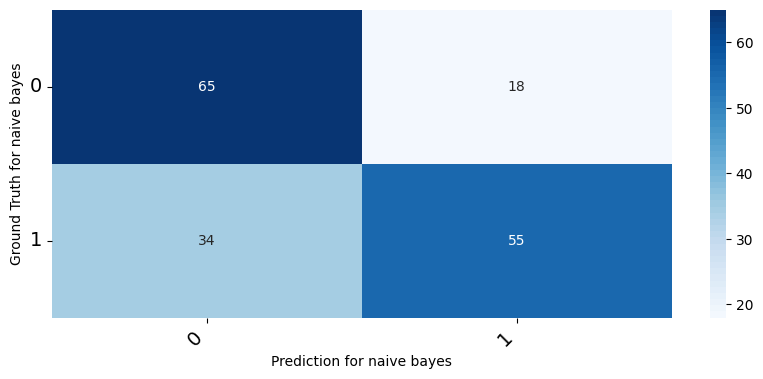

In [39]:
plt.figure(figsize=(10, 4))
name = 'naive bayes'
heatmap = sns.heatmap(data=pd.DataFrame(confusion_matrix(Y_test.reshape(len(Y_test), ), nb_pred)), annot=True, fmt="d",
                          cmap=sns.color_palette("Blues", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth for ' + name)
plt.xlabel('Prediction for ' + name)
plt.show()
